In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
def find_nearest(rgb):
    r, g, b = rgb
    distances = []
    for key, values in pixel_class.items():
        for value in values:
            R, G, B = value
            distance = ((R - r)**2 + (G - g)**2 + (B - b)**2)**.5
            distances.append((key, value, distance))
    distances = sorted(distances, key=lambda x: x[2])
    nearest_pixel, class_ = distances[0][1], distances[0][0]
    return nearest_pixel, class_

In [3]:
pixel_class = {
    'void': [(0, 0, 0)],
    'ground': [(128, 64, 128), (81,  0, 81)],
    'construction': [(230, 150, 140), (70, 70, 70), (102, 102, 156), (190, 153, 153)],
    'object': [(153, 153, 153)],
    'nature': [(107, 142, 35), (152, 251, 152)],
    'sky': [(70, 130, 180)],
    'human': [(220, 20, 60), (255, 0, 0)],
    'vehicle': [(0, 0, 142), (0, 0, 142), (0, 0, 70), (0, 60, 100), (0, 0, 90), (0, 0, 110), 
                (0, 80, 110), (0, 0, 230), (119, 11, 32)]
}

In [4]:
class_to_ids = {class_: i for i, class_ in enumerate(pixel_class.keys())}

In [5]:
image_path = "../data/train/"
image_names = os.listdir(image_path)

In [7]:
idx = 150

In [8]:
image = cv2.cvtColor(cv2.imread(os.path.join(image_path, image_names[idx])), cv2.COLOR_BGR2RGB)
image, label = image[:, :256, :], image[:, 256:, :]

In [10]:
label_transposed = np.transpose(label, [2, 0, 1])

In [11]:
corrected_label = np.zeros((3, 256, 256), dtype='uint8')
classes = []
for i in tqdm(range(label_transposed.shape[1])):
    for j in range(label_transposed.shape[2]):
        rgb = label_transposed[:, i, j]
        neatest_pixel, class_ = find_nearest(rgb)
        classes.append(class_to_ids[class_])
        corrected_label[:, i, j] = neatest_pixel
corrected_label = np.transpose(corrected_label, [1, 2, 0])

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 256/256 [00:12<00:00, 19.73it/s]


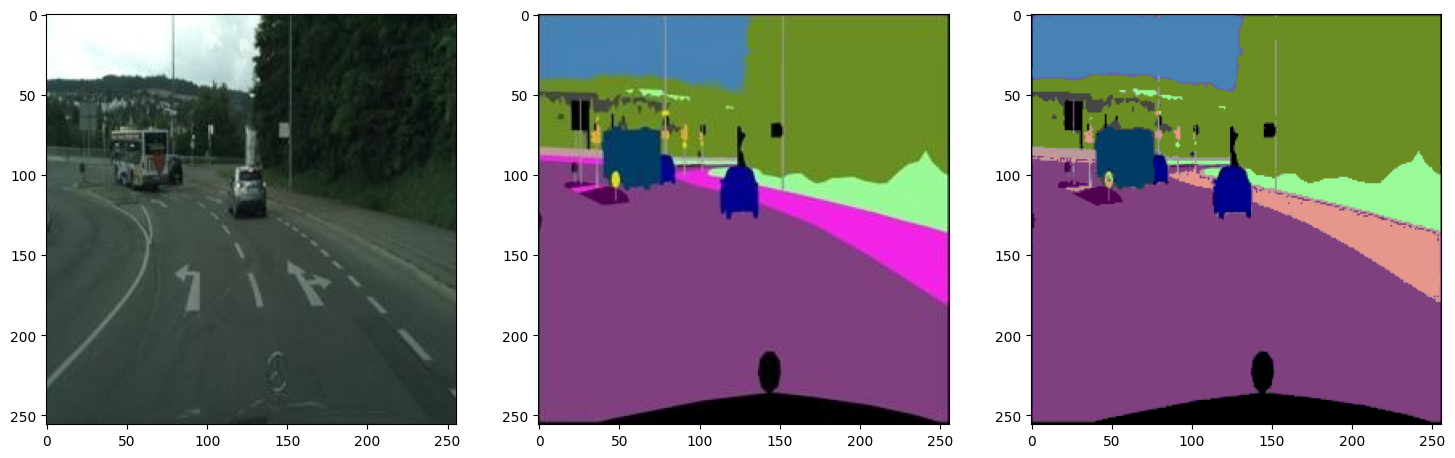

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(18, 7))
ax = axes.ravel()
ax[0].imshow(image)
ax[1].imshow(label)
ax[2].imshow(corrected_label)
plt.show()